In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df_shots = pd.read_csv('training shots')
df_fid = pd.read_csv('fig results')

training_shots = df_shots["cumulative shots"]

In [7]:
baseline_fidelity = df_fid["baseline"]
policy_fidelity = df_fid["policy"]

baseline_reward = -np.log10(1. - baseline_fidelity)
policy_reward = -np.log10(1. - policy_fidelity)

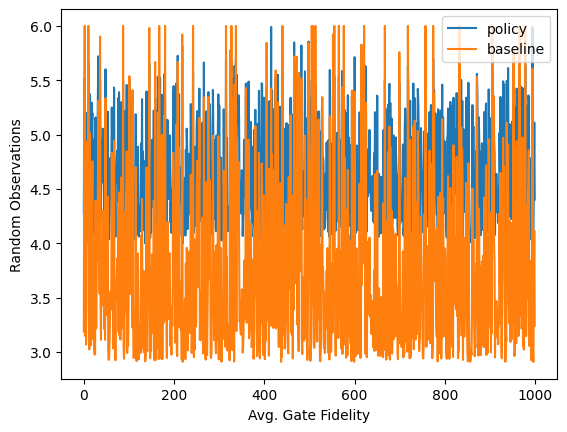

In [8]:
plt.plot(policy_reward, label='policy')
plt.plot(baseline_reward, label='baseline')
plt.xlabel('Avg. Gate Fidelity')
plt.ylabel('Random Observations')
plt.legend()
plt.show()

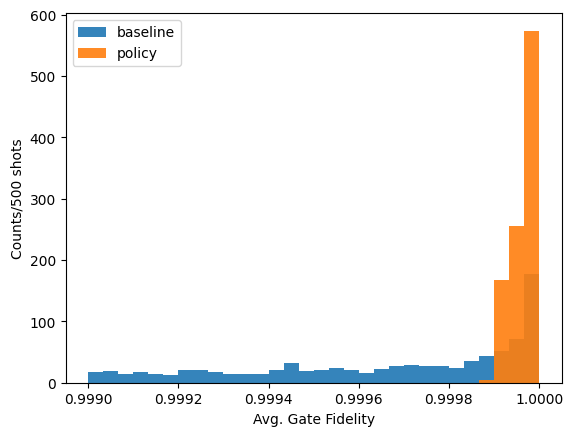

In [9]:
# baseline_fidelity = np.clip(baseline_fidelity, a_max=1 - 1e-5, a_min=None)

bins = np.linspace(0.999, 1, 31)  # 30 bins from 0 to 1
alpha = 0.9
plt.hist(baseline_fidelity, label='baseline', bins=bins, alpha=alpha)
plt.hist(policy_fidelity, label='policy', bins=bins, alpha=alpha)
plt.xlabel('Avg. Gate Fidelity')
plt.ylabel('Counts/500 shots')
plt.legend()
plt.show()

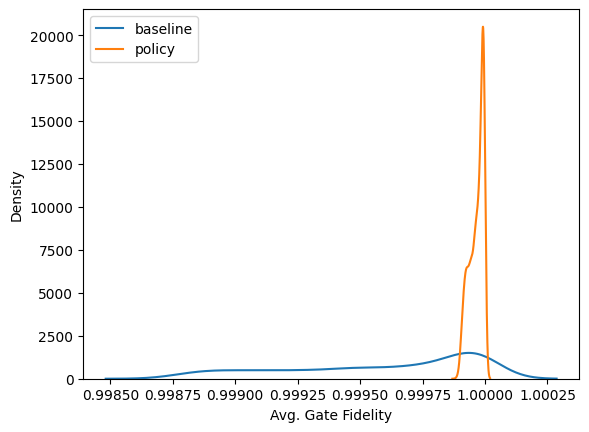

In [10]:
sns.kdeplot(baseline_fidelity, label='baseline')
sns.kdeplot(policy_fidelity, label='policy')
plt.xlabel('Avg. Gate Fidelity')
plt.ylabel('Density')
plt.legend()
plt.show()

/var/folders/g4/_yhz0jm50s17zz2ms7wwytcr0000gr/T/ipykernel_11877/2473277318.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([baseline_fidelity, policy_fidelity], labels=['baseline', 'policy'])
/var/folders/g4/_yhz0jm50s17zz2ms7wwytcr0000gr/T/ipykernel_11877/2473277318.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


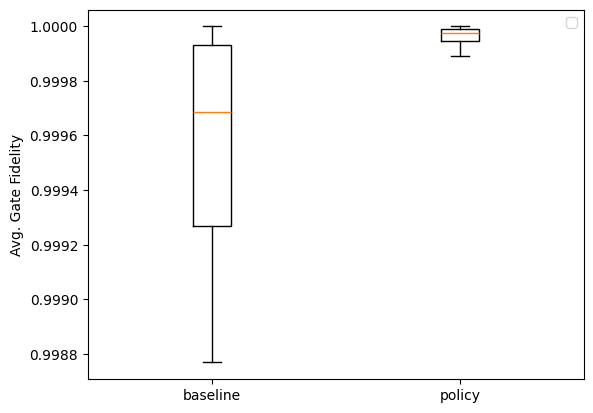

In [11]:
plt.boxplot([baseline_fidelity, policy_fidelity], labels=['baseline', 'policy'])
plt.ylabel('Avg. Gate Fidelity')
plt.legend()
plt.show()

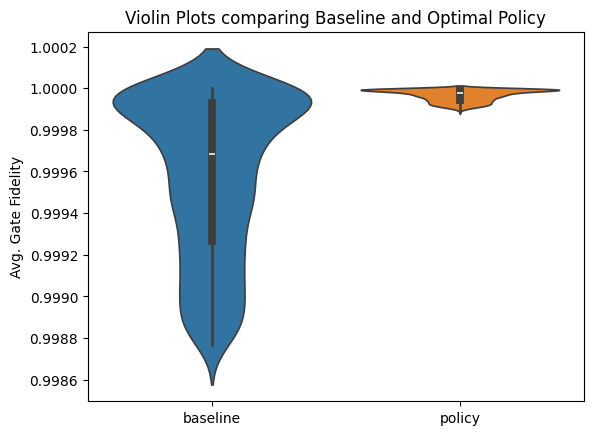

In [12]:
sns.violinplot(data=[baseline_fidelity, policy_fidelity], orient='v')
plt.xticks([0, 1], ['baseline', 'policy'])
plt.ylabel('Avg. Gate Fidelity')
plt.title('Violin Plots comparing Baseline and Optimal Policy')
plt.show()

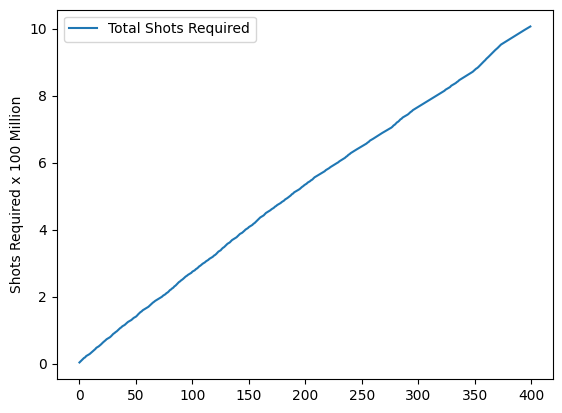

In [14]:
plt.plot(np.cumsum(training_shots) / 1e7, label='Total Shots Required')
plt.ylabel('Shots Required x 100 Million')
plt.legend()
plt.show()